In [1]:
import pandas as pd
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
enComp = pd.read_csv('energydata_complete.csv')
enComp.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [3]:
enComp.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [4]:
#rename columns
'''ColumnNames = { 'T1' :  'TempKit', 'RH_1' : 'HumKit',
                'T2' : 'TempLivR', 'RH_2' : 'HumLivR',
                'T3' : 'TempLaundry', 'RH_3' : 'HumLaundry',
                'T4' : 'TempOffice','RH_4' : 'HumOffice',
                'T5' : 'TempBath', 'RH_5' : 'HumBath',
                'T6' : 'TempOutsideN', 'RH_6' : 'HumOutsideN',
                'T7' : 'TempIron', 'RH_7' : 'HumIron',
                'T8' : 'TempTeenager', 'RH_8' : 'HumTeenager',
                'T9' : 'TempParents', 'RH_9' : 'HumParents'
                   }'''


"ColumnNames = { 'T1' :  'TempKit', 'RH_1' : 'HumKit',\n                'T2' : 'TempLivR', 'RH_2' : 'HumLivR',\n                'T3' : 'TempLaundry', 'RH_3' : 'HumLaundry',\n                'T4' : 'TempOffice','RH_4' : 'HumOffice',\n                'T5' : 'TempBath', 'RH_5' : 'HumBath',\n                'T6' : 'TempOutsideN', 'RH_6' : 'HumOutsideN',\n                'T7' : 'TempIron', 'RH_7' : 'HumIron',\n                'T8' : 'TempTeenager', 'RH_8' : 'HumTeenager',\n                'T9' : 'TempParents', 'RH_9' : 'HumParents'\n                   }"

In [6]:
#enComp.rename(columns=ColumnNames, inplace= True)

In [7]:
enComp.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [8]:
enComp['RH_out']

0        92.000000
1        92.000000
2        92.000000
3        92.000000
4        92.000000
           ...    
19730    55.666667
19731    56.000000
19732    56.333333
19733    56.666667
19734    57.000000
Name: RH_out, Length: 19735, dtype: float64

In [9]:
enComp = enComp.drop(columns=['date', 'lights'])

In [10]:
enComp.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [11]:
enComp.describe()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

normEnComp = pd.DataFrame(scaler.fit_transform(enComp), columns=enComp.columns)
featuresEnComp = normEnComp.drop(columns=['Appliances'])

appTarget = normEnComp['Appliances']

In [13]:
# Split our dataset into the training and testing dataset: 70/30 train-test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(featuresEnComp, appTarget, test_size=0.3, random_state=42)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
multiReg = LinearRegression()

multiReg.fit(x_train, y_train)

LinearRegression()

In [16]:
# Multiple LinearReg
# xVar = normEnComp['rv1']
# yVar = normEnComp['Appliances']

In [17]:
print("Intercept: ", multiReg.intercept_)
print("Coefficients:")
list(zip(featuresEnComp, multiReg.coef_))

Intercept:  0.15290295882253008
Coefficients:


[('T1', -0.003281051194345085),
 ('RH_1', 0.5535465998386389),
 ('T2', -0.2361779186949103),
 ('RH_2', -0.45669794833849897),
 ('T3', 0.2906271374970346),
 ('RH_3', 0.09604827330604852),
 ('T4', 0.028980998554441095),
 ('RH_4', 0.026385776891802652),
 ('T5', -0.01565684277862897),
 ('RH_5', 0.016005788428133803),
 ('T6', 0.2364249088665082),
 ('RH_6', 0.038048652058949806),
 ('T7', 0.010318776387943488),
 ('RH_7', -0.044613637361088934),
 ('T8', 0.10199504524367499),
 ('RH_8', -0.15759547759013126),
 ('T9', -0.1899407730083079),
 ('RH_9', -0.03980031661682158),
 ('T_out', -0.3218596681300848),
 ('Press_mm_hg', 0.006839326382765691),
 ('RH_out', -0.07767065318166694),
 ('Windspeed', 0.029183129198429983),
 ('Visibility', 0.012306608976810702),
 ('Tdewpoint', 0.11775773489644299),
 ('rv1', 0.0007700981331771242),
 ('rv2', 0.0007700981331771242)]

In [18]:
# prediction of test set
yPredValue = multiReg.predict(x_test)

# predicted values
print('Prediction for test set: {}'.format(yPredValue))

Prediction for test set: [0.03322207 0.24411599 0.03400024 ... 0.06844707 0.10032325 0.05722198]


In [19]:
multiDiff = pd.DataFrame({'Actual value': y_test, 'Predicted value': yPredValue})
multiDiff.head()

,Actual value,Predicted value
8980,0.028037,0.033222
2754,0.074766,0.244116
9132,0.037383,0.034000
14359,0.037383,0.105377
8875,0.056075,0.023360


# Evaluation

In [20]:
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, yPredValue)
meanSqErr = metrics.mean_squared_error(y_test, yPredValue)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, yPredValue))
R2Score = metrics.r2_score(y_test,yPredValue)
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
print('R2 Score:', R2Score)

Mean Absolute Error: 0.05013362397742957
Mean Square Error: 0.00765877886719537
Root Mean Square Error: 0.08751444947661711
R2 Score: 0.14890246319303513


In [21]:
from sklearn.metrics import r2_score
from sklearn.metrics import  mean_squared_error
from sklearn.metrics import mean_absolute_error

In [22]:
mae = mean_absolute_error(y_test, yPredValue)
round(mae, 3)

0.05

In [23]:
rmse = np.sqrt(mean_squared_error(y_test, yPredValue))
round(rmse, 3)

0.088

In [24]:
r2_score = r2_score(y_test, yPredValue)
round(r2_score, 3)

0.149

In [25]:
rss = np.sum(np.square(y_test - yPredValue))
round(rss, 3)

45.348

In [121]:
multiReg.score(x_train, y_train)

0.14471942308518737

# Quiz: 

In [21]:
simpleReg = enComp[['T2','T6']].sample(15, random_state= 42)
simpleReg.head()

,T2,T6
8980,17.760000,1.198571
2754,21.290000,2.530000
9132,17.633333,-0.266667
14359,23.890000,11.160000
8875,16.463333,-0.733333


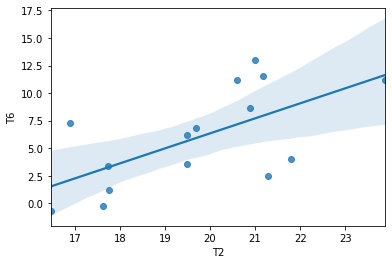

In [22]:
sea.regplot(x= 'T2', y= 'T6', data = simpleReg);

In [27]:
from sklearn.model_selection import train_test_split
x= enComp['T2']
y= enComp['T6']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [28]:
from sklearn.linear_model import LinearRegression

linearReg = LinearRegression()
#fit the model to the training dataset
linearReg.fit(x_train.values.reshape(-1, 1), y_train)

LinearRegression()

In [29]:
pred_value = linearReg.predict(x_test.values.reshape(-1, 1))

In [30]:
from sklearn.metrics import r2_score
from sklearn.metrics import  mean_squared_error
from sklearn.metrics import mean_absolute_error

In [31]:
mae = mean_absolute_error(y_test, pred_value)
round(mae, 3)

2.823

In [32]:
rmse = np.sqrt(mean_squared_error(y_test, pred_value))
round(rmse, 3)

3.63

In [33]:
r2_score = r2_score(y_test, pred_value)
round(r2_score, 3)

0.643

In [34]:
rss = np.sum(np.square(y_test - pred_value))
round(rss, 3)

78033.972

In [49]:
#Using Ridge Regression with Alpha = 0.4
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)

ridge_reg.fit(x_train.values.reshape(-1, 1), y_train)
pred_2 = ridge_reg.predict(x_test.values.reshape(-1, 1))
print('Root Mean Square Error (RMSE)', np.sqrt(metrics.mean_squared_error(y_test,pred_2))) 

Root Mean Square Error (RMSE) 3.630315114753088


In [50]:
#Using Lasso Regression with Alpha = 0.001
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)

lasso_reg.fit(x_train.values.reshape(-1, 1), y_train)
pred_3 = lasso_reg.predict(x_test.values.reshape(-1, 1))
print('Root Mean Square Error (RMSE)', np.sqrt(metrics.mean_squared_error(y_test,pred_2))) 

Root Mean Square Error (RMSE) 3.630315114753088


In [52]:
print("Intercept: ", lasso_reg.intercept_)
print("Coefficients:")
list(zip(featuresEnComp, lasso_reg.coef_))

Intercept:  -37.36162925201276
Coefficients:


[('T1', 2.225110034771108)]